# Teste Wine Dataset 

In [1]:
#Bibliotecas/Pacotes Necessários:
library(tidyr)
library(ggplot2)
library(gridExtra)


# Importação do dataset

In [2]:
teste = read.csv("wine.data",sep = ",")

colnames(teste) = c("class", "alcohol","malic acid","ash","alcalinity of ash", "magnesium","total phenols","flavanoids","nonflavanoid phenols","proanthocyanins","color intensity","hue","ratio of diluted wines","proline")

tabelaWine = data.frame(teste)

In [3]:
head(tabelaWine)

,class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


# Questão 1

## a) Calcule a média e desvio padrão para todos os atributos


In [4]:
mediaWine = colMeans(tabelaWine)
head(mediaWine)



class           alcohol        malic.acid               ash 
         1.943503         12.993672          2.339887          2.366158 
alcalinity.of.ash         magnesium 
        19.516949         99.587571

In [5]:
desvioTabelaWine = apply(tabelaWine, 2, sd)
head(desvioTabelaWine)

class           alcohol        malic.acid               ash 
        0.7739914         0.8088084         1.1193144         0.2750804 
alcalinity.of.ash         magnesium 
        3.3360711        14.1740185

## b)Calcule a média e desvio padrão para todos os atributos agrupado pelo tipo de vinho

In [6]:
#media
mediaAgregWine = aggregate(tabelaWine[, 2:14], by = list(tabelaWine$class), mean)
mediaAgregWine

Group.1,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,13.73638,2.015862,2.456034,17.06207,105.9828,2.840862,2.9810345,0.2901724,1.892586,5.526379,1.0624138,3.144655,1116.5862
2,12.27873,1.932676,2.244789,20.23803,94.5493,2.258873,2.0808451,0.3636620,1.630282,3.086620,1.0562817,2.785352,519.5070
3,13.15375,3.333750,2.437083,21.41667,99.3125,1.678750,0.7814583,0.4475000,1.153542,7.396250,0.6827083,1.683542,629.8958


In [7]:
#desvio
sdAgregWine = aggregate(tabelaWine[, 2:14], by = list(tabelaWine$class), sd)
sdAgregWine

Group.1,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.4616321,0.6934001,0.2291245,2.561375,10.22465,0.3418797,0.4008311,0.07064841,0.4124193,1.2493011,0.1174631,0.3455035,223.3528
2,0.5379642,1.0155687,0.3154673,3.349770,16.75350,0.5453611,0.7057008,0.12396128,0.6020678,0.9249293,0.2029368,0.4965735,157.2112
3,0.5302413,1.0879057,0.1846902,2.258161,10.89047,0.3569709,0.2935041,0.12413959,0.4088359,2.3109421,0.1144411,0.2721114,115.0970


## c)Apresente o gráfico de distribuição de densidade para cada atributo pelo tipo de vinho

In [8]:
longTabelaWine = gather(tabelaWine, key = "variavel",value = "valor" , -class)
head(longTabelaWine)

,class,variavel,valor
,<int>,<chr>,<dbl>
1,1,alcohol,13.20
2,1,alcohol,13.16
3,1,alcohol,14.37
4,1,alcohol,13.24
5,1,alcohol,14.20
6,1,alcohol,14.39


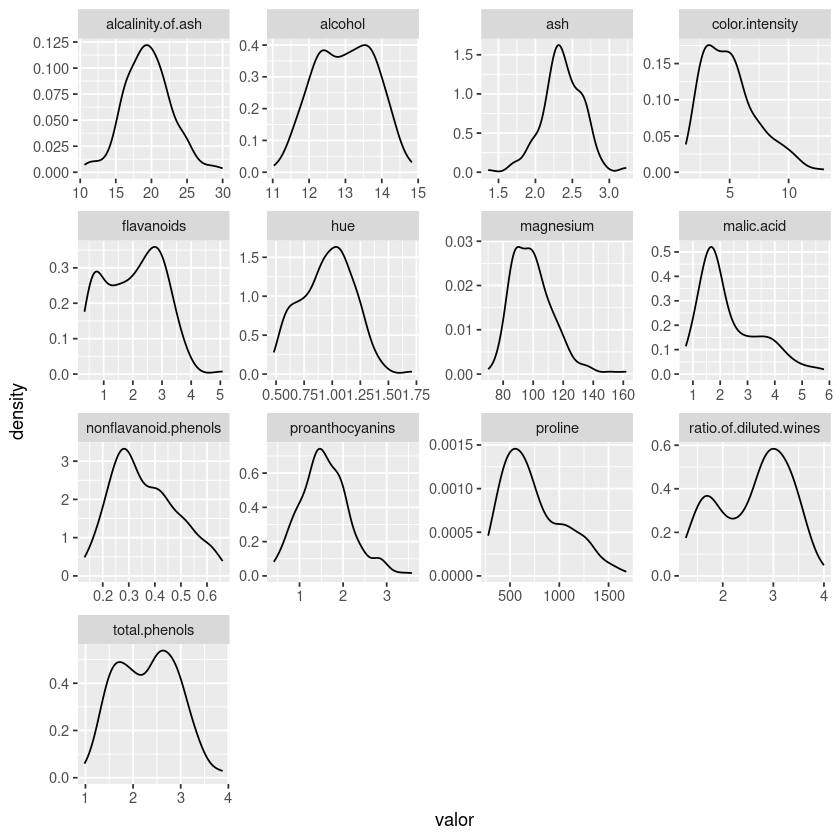

In [9]:
ggplot(longTabelaWine, aes(x = valor), fill = "class") +
    geom_density(alpha = 0.5) +
    facet_wrap(~variavel, scales = "free")

#talvez o "fill" nao seja necessario
#tentamos com fill e deu erro no inicio, 
#mas depois colocamos sem e foi ai quando colocamos o fill de novo parou de dar erro
#entender com o prof pq isso

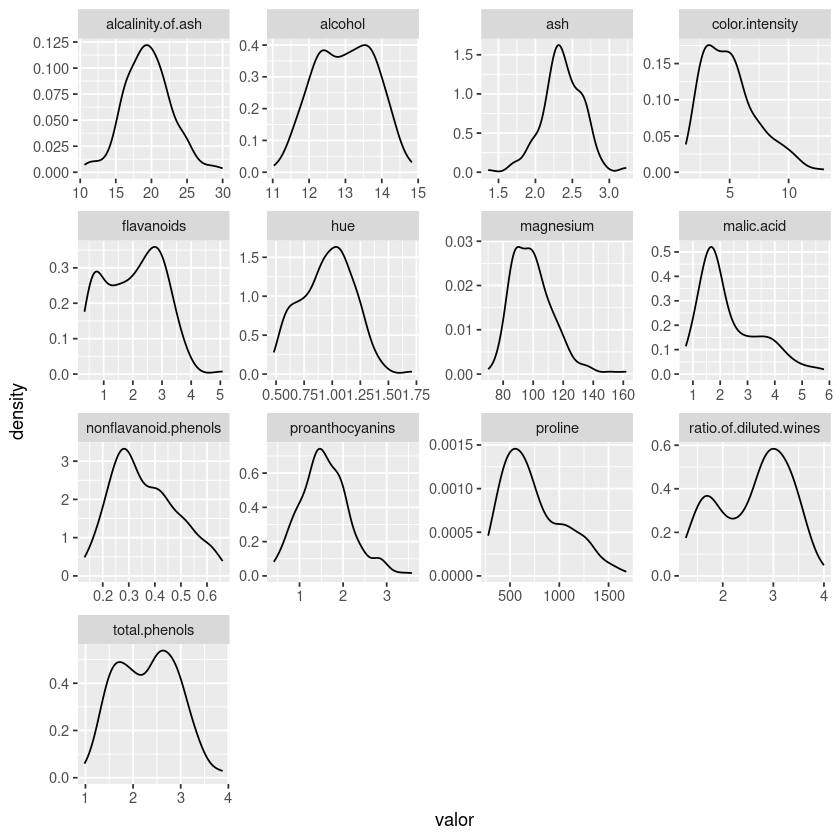

In [10]:
ggplot(longTabelaWine, aes(x = valor)) +
    geom_density(alpha = 0.5) +
    facet_wrap(~variavel, scales = "free")

## d)Apresente o gráfico de box-plot para cada atributo pelo tipo de vinho

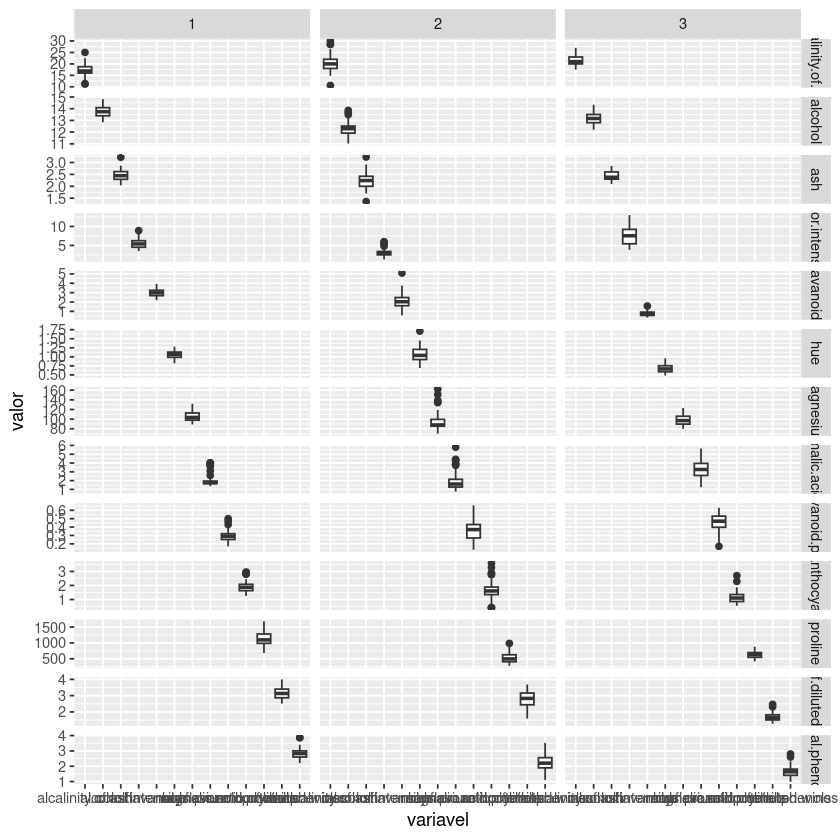

In [11]:
#box plot separado:
ggplot(longTabelaWine, aes(x = variavel, y = valor, group = class)) +
  geom_boxplot() +
  facet_grid(variavel ~ class, scales="free_y")


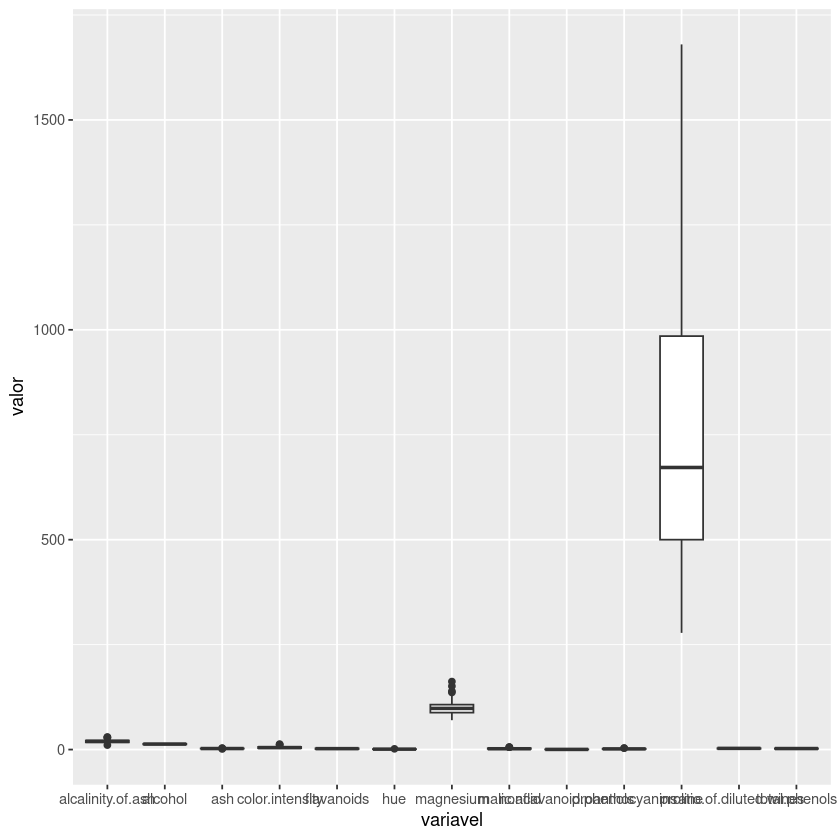

In [12]:
# box plot de todos:
ggplot(longTabelaWine, aes(x = variavel, y = valor)) +
  geom_boxplot()

## e) Apresente o gráfico de dispersão entre os atributos

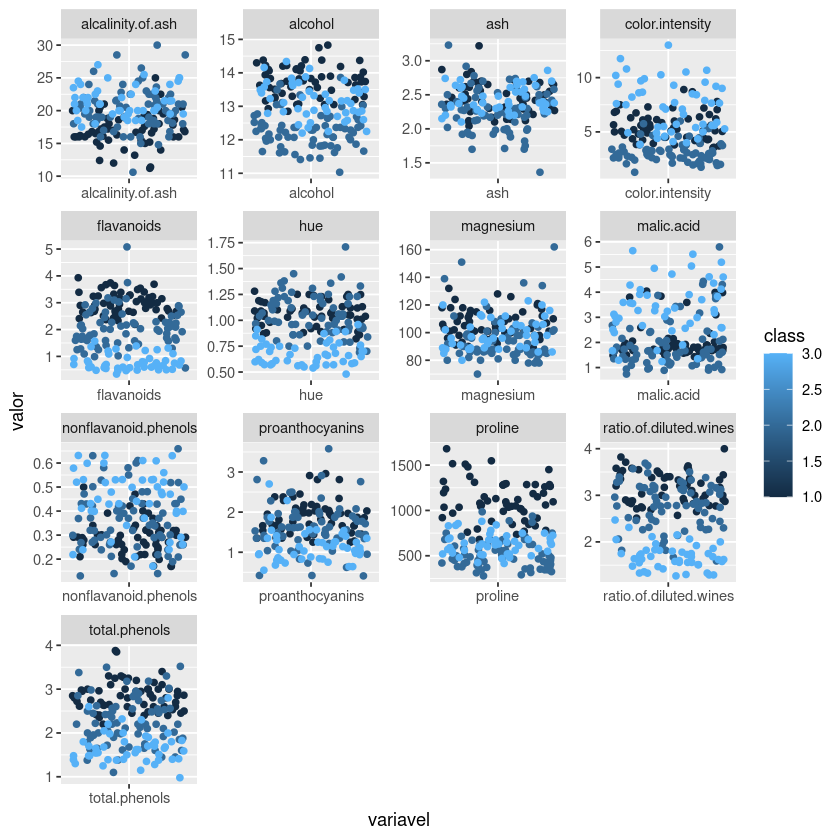

In [13]:
ggplot(longTabelaWine, aes(x = variavel, y = valor, color = class)) +
  geom_jitter(width = 0.5, alpha = 1) + 
    #scale_color_manual(values = c("1" = "red", "2" = "blue", "3" = "green")) +
    facet_wrap(~variavel, scales = "free")

In [14]:
## ggplot(longTabelaWine, aes(x = variavel, y = valor, color = class)) +
  geom_jitter(width = 0.2, alpha = 0.5)

geom_point: na.rm = FALSE
stat_identity: na.rm = FALSE
position_jitter 

# Questão 2

## a) Realize a discretização dos atributos números (excetuando a classe) em faixas de valores alto, médio, baixo. Isso implica em converter os atributos para fator


In [15]:
#selecionando atributos numéricos:
num_cols = tabelaWine[, sapply(tabelaWine, is.numeric) & !colnames(tabelaWine) %in% "class"]

In [16]:
#discretizando 
tabelaWine_discreta = lapply(num_cols, function(x) cut(x, breaks = quantile(x, probs = c(0, 0.33, 0.67, 1)), labels = c("baixo", "medio", "alto")))

In [17]:
#combinando com classe
tabelaWine_discreta <- cbind(tabelaWine$class, as.data.frame(tabelaWine_discreta))

In [18]:
#visualizando:
head(tabelaWine_discreta)

,tabelaWine$class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>
1,1,medio,medio,baixo,baixo,medio,alto,alto,baixo,baixo,medio,medio,alto,alto
2,1,medio,medio,alto,medio,medio,alto,alto,medio,alto,alto,medio,alto,alto
3,1,alto,medio,alto,baixo,alto,alto,alto,baixo,alto,alto,baixo,alto,alto
4,1,medio,alto,alto,medio,alto,alto,alto,medio,alto,medio,medio,medio,medio
5,1,alto,medio,medio,baixo,alto,alto,alto,medio,alto,alto,medio,medio,alto
6,1,alto,medio,medio,baixo,medio,medio,medio,medio,alto,medio,medio,alto,alto


## b) Converta o atributo do tipo de vinho para mapeamento categórico

In [19]:
#pegando dal como exemplo fornecido da biblioteca do professor

if (!exists("repos_name"))
  repos_name <<- getOption("repos")[1]

setrepos <- function(repos=repos) {
  repos_name <<- repos 
}

loadlibrary <- function(packagename) 
{
  if (!require(packagename, character.only = TRUE))
  {
    install.packages(packagename, repos=repos_name, dep=TRUE, verbose = FALSE)
    require(packagename, character.only = TRUE)
  }
}

load_dal <- function() 
{
  if (!require("dal", character.only = TRUE))
  {
    library(devtools) 
    
    devtools::install_github("cefet-rj-dal/dal", force=TRUE)
    
    library(dal)
  }
}

In [20]:
load_dal()

Loading required package: dal

Warning message:
“replacing previous import ‘FNN::knn.cv’ by ‘class::knn.cv’ when loading ‘dal’”
Warning message:
“replacing previous import ‘FNN::knn’ by ‘class::knn’ when loading ‘dal’”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dbscan::dbscan’ by ‘fpc::dbscan’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dplyr::combine’ by ‘randomForest::combine’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::cov2cor’ by ‘stats::cov2cor’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dbscan::as.dendrogram’ by ‘stats::as.dendrogram’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘dal’”
Warning message:
“replacing previous import ‘dplyr::lag’ by ‘stats::lag’ when loading ‘dal’”
Warning message:
“replacing previous import ‘Matrix::toeplitz’ by ‘s

In [21]:
teste_tabela_wine = tabelaWine

In [22]:
#transformando coluna de classe em fator
teste_tabela_wine$class = as.factor(teste_tabela_wine$class)

In [23]:
head(teste_tabela_wine)

,class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290


In [24]:
cm = categ_mapping("class")

In [25]:
tabela_wine_categorico_map = transform(cm, teste_tabela_wine)

In [26]:
head(tabela_wine_categorico_map)

,class,alcohol,malic.acid,ash,alcalinity.of.ash,magnesium,total.phenols,flavanoids,nonflavanoid.phenols,proanthocyanins,color.intensity,hue,ratio.of.diluted.wines,proline,class1,class2,class3
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1,0,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1,0,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1,0,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1,0,0
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450,1,0,0
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290,1,0,0


# Questão 5 - Execute os padrões frequentes a partir dos dados convertidos em fatores

In [27]:
library(arules)

# Converter dataframe em transações
transacoes = as(tabelaWine_discreta[, -1], "transactions")

# Minerar regras de associação
regras = apriori(transacoes, parameter = list(supp = 0.1, conf = 0.8))

# Visualizar regras
inspect(head(regras))


Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack



Attaching package: ‘arules’


The following objects are masked from ‘package:base’:

    abbreviate, write




Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.8    0.1    1 none FALSE            TRUE       5     0.1      1
 maxlen target  ext
     10  rules TRUE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 17 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[39 item(s), 177 transaction(s)] done [0.00s].
sorting and recoding items ... [39 item(s)] done [0.00s].
creating transaction tree ... done [0.00s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [674 rule(s)] done [0.00s].
creating S4 object  ... done [0.00s].
    lhs                               rhs                              support confidence  coverage     lift count
[1] {flavanoids=alto}              => {total.phenols=alto}           0.2824859  0.8928571 0.3163842 2.678571    50
[2] {total.phenols=alto}           => {flavanoids=alto